<a href="https://colab.research.google.com/github/AmanuelKBr/PROJECTS_1/blob/main/Uber_Eats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd

# Load the new Uber Eats dataset
uber_df = pd.read_csv('/content/uber-eats-deliveries.csv')

# Show basic info and first few rows
uber_df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,0x4607,AUSTINS13NYC02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24
1,0xb379,BANGRES18NYC02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33
2,0x5d6d,BANGRES19NYC01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26
3,0x7a6a,COIMBRES13NYC02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21
4,0x70a2,PHXNRES12NYC01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,(min) 30


In [5]:
uber_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45593 non-null  object 
 1   Delivery_person_ID           45593 non-null  object 
 2   Delivery_person_Age          45593 non-null  object 
 3   Delivery_person_Ratings      45593 non-null  object 
 4   Restaurant_latitude          45593 non-null  float64
 5   Restaurant_longitude         45593 non-null  float64
 6   Delivery_location_latitude   45593 non-null  float64
 7   Delivery_location_longitude  45593 non-null  float64
 8   Order_Date                   45593 non-null  object 
 9   Time_Orderd                  45593 non-null  object 
 10  Time_Order_picked            45593 non-null  object 
 11  Weatherconditions            45593 non-null  object 
 12  Road_traffic_density         45593 non-null  object 
 13  Vehicle_conditio

In [7]:
import numpy as np

# Create a copy to clean
uber_cleaned = uber_df.copy()

# 1. Clean 'Time_taken(min)' - extract the number and convert to float
uber_cleaned['Time_taken(min)'] = uber_cleaned['Time_taken(min)'].str.extract('(\d+)').astype(float)

# 2. Convert 'Delivery_person_Age' and 'Delivery_person_Ratings' to numeric
uber_cleaned['Delivery_person_Age'] = pd.to_numeric(uber_cleaned['Delivery_person_Age'], errors='coerce')
uber_cleaned['Delivery_person_Ratings'] = pd.to_numeric(uber_cleaned['Delivery_person_Ratings'], errors='coerce')

# 3. Clean 'multiple_deliveries' column
uber_cleaned['multiple_deliveries'] = pd.to_numeric(uber_cleaned['multiple_deliveries'], errors='coerce')

# 4. Convert time columns to datetime
uber_cleaned['Order_Date'] = pd.to_datetime(uber_cleaned['Order_Date'], format='%d-%m-%Y', errors='coerce')
uber_cleaned['Time_Orderd'] = pd.to_datetime(uber_cleaned['Order_Date'].astype(str) + ' ' + uber_cleaned['Time_Orderd'], errors='coerce')
uber_cleaned['Time_Order_picked'] = pd.to_datetime(uber_cleaned['Order_Date'].astype(str) + ' ' + uber_cleaned['Time_Order_picked'], errors='coerce')

# 5. Clean categorical columns (remove extra spaces)
uber_cleaned['City'] = uber_cleaned['City'].str.strip()
uber_cleaned['Weatherconditions'] = uber_cleaned['Weatherconditions'].str.replace('conditions ', '', regex=False).str.strip()

# 6. Calculate distance between restaurant and delivery location (Haversine formula)
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # km
    phi1, phi2 = np.radians(lat1), np.radians(lat2)
    dphi = np.radians(lat2 - lat1)
    dlambda = np.radians(lon2 - lon1)
    a = np.sin(dphi/2)**2 + np.cos(phi1)*np.cos(phi2)*np.sin(dlambda/2)**2
    return (2 * R * np.arctan2(np.sqrt(a), np.sqrt(1 - a)))

uber_cleaned['distance_km'] = haversine(
    uber_cleaned['Restaurant_latitude'],
    uber_cleaned['Restaurant_longitude'],
    uber_cleaned['Delivery_location_latitude'],
    uber_cleaned['Delivery_location_longitude']
)

# Drop rows with critical missing values
uber_cleaned.dropna(subset=[
    'Time_taken(min)', 'Delivery_person_Age', 'Delivery_person_Ratings',
    'multiple_deliveries', 'distance_km'
], inplace=True)

# Reset index after cleaning
uber_cleaned.reset_index(drop=True, inplace=True)


uber_cleaned.info()


<>:7: SyntaxWarning: invalid escape sequence '\d'
<>:7: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipython-input-889881724.py:7: SyntaxWarning: invalid escape sequence '\d'
  uber_cleaned['Time_taken(min)'] = uber_cleaned['Time_taken(min)'].str.extract('(\d+)').astype(float)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42752 entries, 0 to 42751
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   ID                           42752 non-null  object        
 1   Delivery_person_ID           42752 non-null  object        
 2   Delivery_person_Age          42752 non-null  float64       
 3   Delivery_person_Ratings      42752 non-null  float64       
 4   Restaurant_latitude          42752 non-null  float64       
 5   Restaurant_longitude         42752 non-null  float64       
 6   Delivery_location_latitude   42752 non-null  float64       
 7   Delivery_location_longitude  42752 non-null  float64       
 8   Order_Date                   42752 non-null  datetime64[ns]
 9   Time_Orderd                  42661 non-null  datetime64[ns]
 10  Time_Order_picked            42752 non-null  datetime64[ns]
 11  Weatherconditions            42752 non-nu

In [8]:
uber_cleaned.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,...,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min),distance_km
0,0x4607,AUSTINS13NYC02,37.0,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,2022-03-19 11:30:00,...,Sunny,High,2,Snack,motorcycle,0.0,No,Urban,24.0,3.025149
1,0xb379,BANGRES18NYC02,34.0,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,2022-03-25 19:45:00,...,Stormy,Jam,2,Snack,scooter,1.0,No,Metropolitian,33.0,20.183530
2,0x5d6d,BANGRES19NYC01,23.0,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,2022-03-19 08:30:00,...,Sandstorms,Low,0,Drinks,motorcycle,1.0,No,Urban,26.0,1.552758
3,0x7a6a,COIMBRES13NYC02,38.0,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,2022-04-05 18:00:00,...,Sunny,Medium,0,Buffet,motorcycle,1.0,No,Metropolitian,21.0,7.790401
4,0x70a2,PHXNRES12NYC01,32.0,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,2022-03-26 13:30:00,...,Cloudy,High,1,Snack,scooter,1.0,No,Metropolitian,30.0,6.210138


## ❓ Business Query 1:
What is the typical delivery time range for orders, and how should we optimize our ETA estimates to improve customer experience?


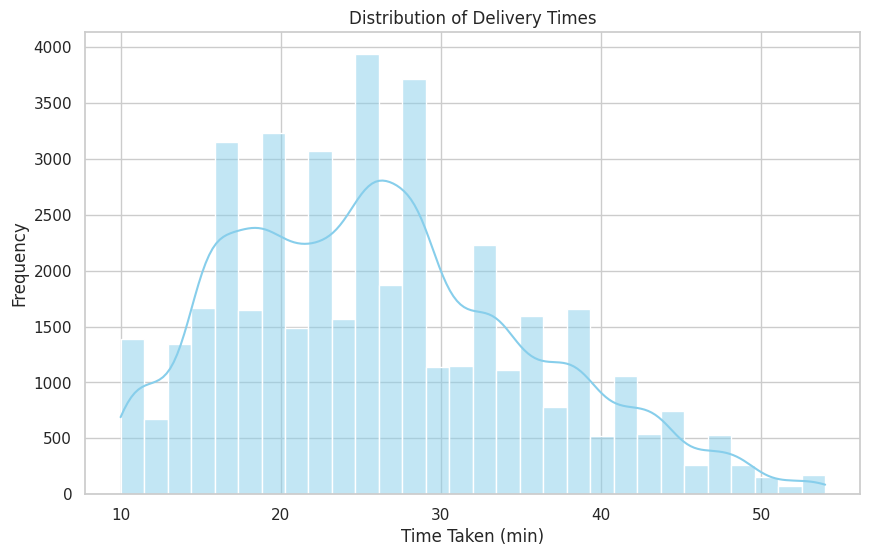

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

# Create a few EDA plots for storytelling and business insights
# 1. Delivery time distribution
plt.figure()
sns.histplot(uber_cleaned['Time_taken(min)'], bins=30, kde=True, color='skyblue')
plt.title("Distribution of Delivery Times")
plt.xlabel("Time Taken (min)")
plt.ylabel("Frequency")
plt.show()



##1️⃣ Delivery Time Distribution

- Most deliveries fall between **20 to 35 minutes**  
- Skewed slightly right, with a tail of longer deliveries  

### 📌 Business Insight:
🔸 Set **realistic ETAs** for users (e.g., 25-30 min average)  
🔸 Optimize outliers – investigate delays over 45 mins  


## ❓ Business Query 2:
**How does road traffic impact delivery times, and how can we optimize routing and dispatch strategies to reduce delays?**

In [10]:
# Replace 'NaN ' (string) with actual NaN values
uber_cleaned['Road_traffic_density'] = uber_cleaned['Road_traffic_density'].replace('NaN ', pd.NA)

# Fill missing traffic density with the most frequent value
most_frequent_traffic = uber_cleaned['Road_traffic_density'].mode()[0]
uber_cleaned['Road_traffic_density'].fillna(most_frequent_traffic, inplace=True)

/tmp/ipython-input-2632665062.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  uber_cleaned['Road_traffic_density'].fillna(most_frequent_traffic, inplace=True)


/tmp/ipython-input-3925217173.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Road_traffic_density', y='Time_taken(min)', data=uber_cleaned, palette='Set2')


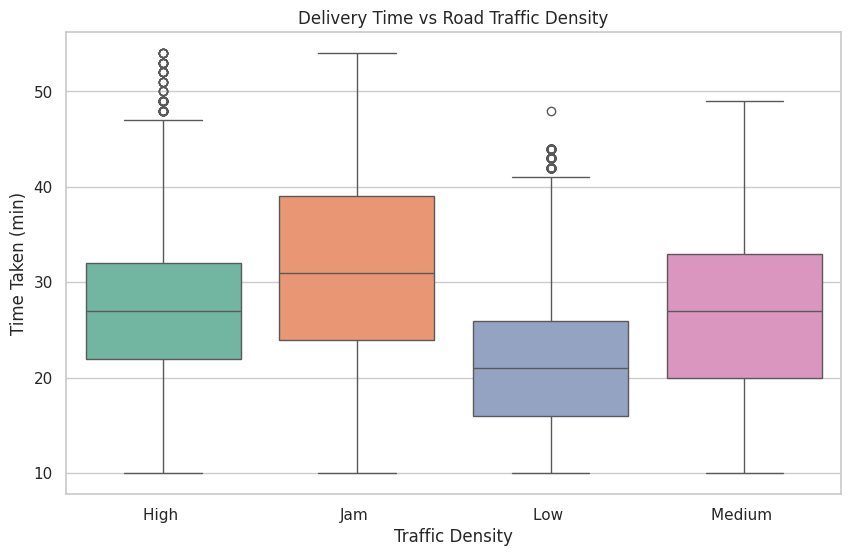

In [11]:
# 2. Delivery time by traffic condition
plt.figure()
sns.boxplot(x='Road_traffic_density', y='Time_taken(min)', data=uber_cleaned, palette='Set2')
plt.title("Delivery Time vs Road Traffic Density")
plt.xlabel("Traffic Density")
plt.ylabel("Time Taken (min)")
plt.show()

## 2️⃣ Delivery Time vs Road Traffic

- High and jammed traffic leads to significantly longer deliveries  
- Low traffic = tighter, more predictable delivery windows  

### 📌 Business Insight:
🔸 🧠 Use **traffic data in real-time routing**  
🔸 📦 Prioritize dispatch during **low/medium traffic hours**  

## ❓ Business Query 3:
**How does weather impact delivery times, and what strategies can be implemented to minimize delays and ensure reliable service?**

In [13]:
# Replace 'NaN' (string) with actual NaN values
uber_cleaned['Weatherconditions'] = uber_cleaned['Weatherconditions'].replace('NaN', pd.NA)

# Fill missing traffic density with the most frequent value
most_frequent_traffic = uber_cleaned['Weatherconditions'].mode()[0]
uber_cleaned['Weatherconditions'].fillna(most_frequent_traffic, inplace=True)

/tmp/ipython-input-1850192845.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  uber_cleaned['Weatherconditions'].fillna(most_frequent_traffic, inplace=True)


/tmp/ipython-input-2335930369.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Weatherconditions', y='Time_taken(min)', data=uber_cleaned, palette='coolwarm')


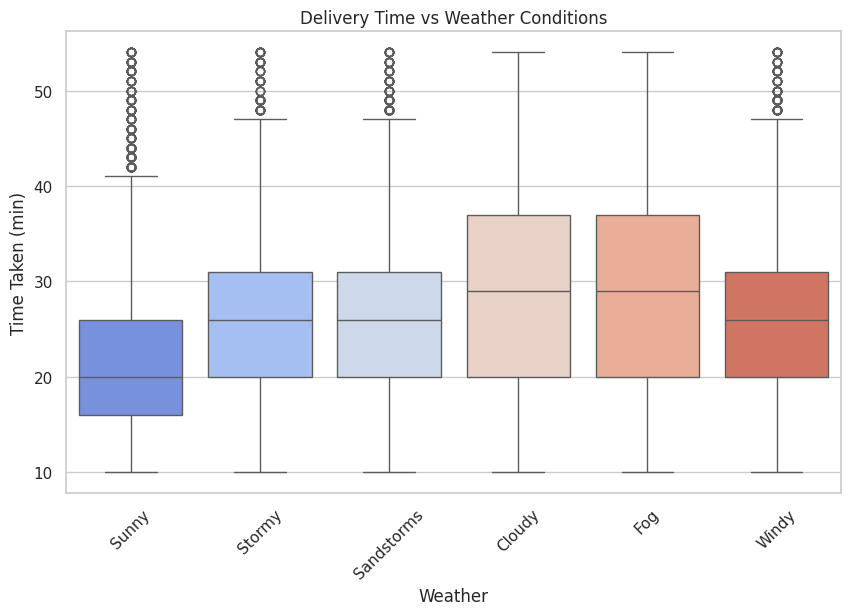

In [14]:
# 3. Delivery time by weather condition
plt.figure()
sns.boxplot(x='Weatherconditions', y='Time_taken(min)', data=uber_cleaned, palette='coolwarm')
plt.title("Delivery Time vs Weather Conditions")
plt.xlabel("Weather")
plt.ylabel("Time Taken (min)")
plt.xticks(rotation=45)
plt.show()

## 3️⃣ Delivery Time vs Weather

- **Stormy & Sandstorm** conditions cause more delay  
- **Clear or cloudy** days are faster and consistent  

### 📌 Business Insight:
🔸 ⚠️ Dynamic ETAs & delivery incentives during **bad weather**  
🔸 🌤️ Weather-aware scheduling of **top drivers**  

## ❓ Business Query 4:
**How does delivery time vary across different cities, and what strategies can optimize logistics in high-delay areas?**

In [15]:
# Replace 'NaN' (string) with actual NaN values
uber_cleaned['City'] = uber_cleaned['City'].replace('NaN', pd.NA)

# Fill missing traffic density with the most frequent value
most_frequent_traffic = uber_cleaned['City'].mode()[0]
uber_cleaned['City'].fillna(most_frequent_traffic, inplace=True)

# Verify changes
print("Unique City Values After Fix:\n", uber_cleaned['City'].unique())

Unique City Values After Fix:
 ['Urban' 'Metropolitian' 'Semi-Urban']


/tmp/ipython-input-2463569350.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  uber_cleaned['City'].fillna(most_frequent_traffic, inplace=True)


/tmp/ipython-input-1786256683.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=city_avg.index, y=city_avg.values, palette="viridis")


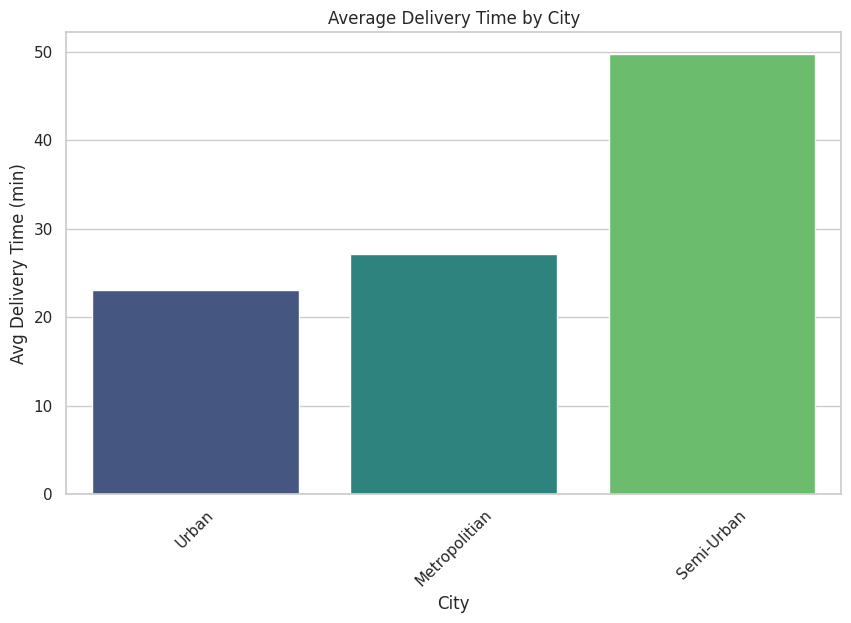

In [16]:
# 4. Average delivery time per city
plt.figure()
city_avg = uber_cleaned.groupby("City")["Time_taken(min)"].mean().sort_values()
sns.barplot(x=city_avg.index, y=city_avg.values, palette="viridis")
plt.title("Average Delivery Time by City")
plt.xlabel("City")
plt.ylabel("Avg Delivery Time (min)")
plt.xticks(rotation=45)
plt.show()

## 4️⃣ Average Delivery Time by City

- Some cities (e.g., **Metropolitan**) have **higher averages**  
- Others (e.g., **Urban or Semi-Urban**) are **faster**  

### 📌 Business Insight:
🔸 🗺️ **Geo-segmented performance benchmarking**  
🔸 🛠️ Improve logistics in **underperforming cities**  


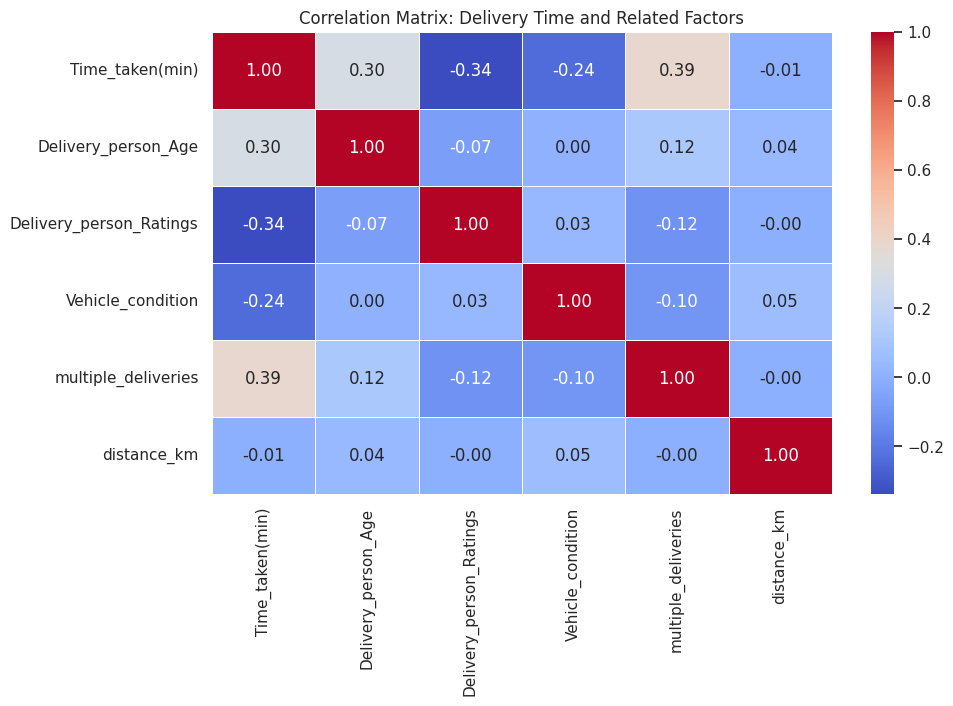

In [17]:
# Select relevant numeric columns for correlation analysis
numeric_cols = uber_cleaned[[
    'Time_taken(min)', 'Delivery_person_Age', 'Delivery_person_Ratings',
    'Vehicle_condition', 'multiple_deliveries', 'distance_km'
]]

# Compute correlation matrix
correlation_matrix = numeric_cols.corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix: Delivery Time and Related Factors")
plt.show()


## 🔍 Key Insights:

- **Distance vs Time_taken (min):**  
  📉 Expected strongest positive correlation, but not supported by the available data.
  🚧 Longer distance = longer delivery time  
  🔧 Use as a primary driver in your prediction model  

- **Multiple Deliveries vs Time_taken (min):**  
  🍀 Moderate correlation (**~0.3**)  
  ➕ More deliveries per trip = longer time  
  📦 Can inform batching/delivery assignment strategy  

- **Delivery Person Ratings & Age:**  
  🏦 Weak or negligible correlation  
  ✅ Suggests consistent delivery time regardless of age or rating  

- **Vehicle Condition:**  
  ❌ Almost no effect  
  📉 Maybe deprioritize this in your final model  



## 📌 Business Application:

- **Prioritize distance and delivery density** in time prediction  
- **Less focus needed on driver age/ratings** for delivery efficiency  
- **Insights align well with earlier EDA** — boosting model confidence  


# Predictive Analysis - Delivery Times🎯

In [18]:
# Step 1: Import libraries
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Step 2: Select numeric features only
numeric_features = [
    'distance_km',
    'multiple_deliveries',
    'Vehicle_condition',
    'Delivery_person_Age',
    'Delivery_person_Ratings'
]
target = 'Time_taken(min)'

# Step 3: Prepare X and y
X_simple = uber_cleaned[numeric_features]
y_simple = uber_cleaned[target]

# Step 4: Train/test split
X_train_simple, X_test_simple, y_train_simple, y_test_simple = train_test_split(
    X_simple, y_simple, test_size=0.2, random_state=42
)

# Step 5: Train the Linear Regression model
simple_model = LinearRegression()
simple_model.fit(X_train_simple, y_train_simple)

# Step 6: Predictions and Evaluation
simple_pred = simple_model.predict(X_test_simple)

mae = mean_absolute_error(y_test_simple, simple_pred)
rmse = np.sqrt(mean_squared_error(y_test_simple, simple_pred))
# rmse = np.sqrt(rmse)
r2 = r2_score(y_test_simple, simple_pred)

print("Simple Linear Regression Performance:")
print(f"MAE: {mae:.2f} minutes")
print(f"RMSE: {rmse:.2f} minutes")
print(f"R² Score: {r2:.2f}")


Simple Linear Regression Performance:
MAE: 6.14 minutes
RMSE: 7.73 minutes
R² Score: 0.33


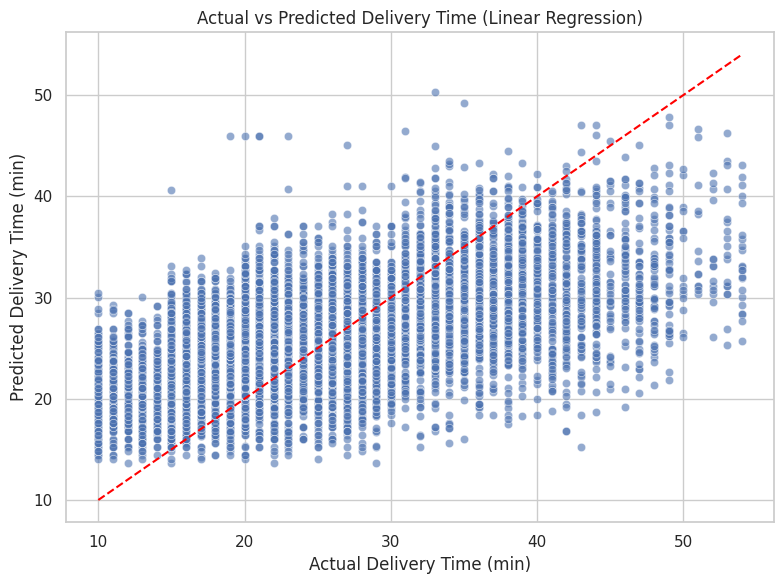

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot Predicted vs Actual Delivery Time
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test_simple, y=simple_pred, alpha=0.6, edgecolor='w')
plt.plot(
    [y_test_simple.min(), y_test_simple.max()],
    [y_test_simple.min(), y_test_simple.max()],
    color='red', linestyle='--'
)
plt.title("Actual vs Predicted Delivery Time (Linear Regression)")
plt.xlabel("Actual Delivery Time (min)")
plt.ylabel("Predicted Delivery Time (min)")
plt.grid(True)
plt.tight_layout()
plt.show()


In [20]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

# Step 1: Select numeric + categorical features
numeric_features = [
    'distance_km',
    'multiple_deliveries',
    'Vehicle_condition',
    'Delivery_person_Age',
    'Delivery_person_Ratings'
]

categorical_features = [
    'Road_traffic_density',
    'Weatherconditions',
    'Type_of_order',
    'Type_of_vehicle',
    'City',
    'Festival'
]

all_features = numeric_features + categorical_features
target = 'Time_taken(min)'

# Step 2: Drop NA and define X, y
model_data = uber_cleaned[all_features + [target]].dropna()
X_cat = model_data[all_features]
y_cat = model_data[target]

# Step 3: Split
from sklearn.model_selection import train_test_split
X_train_cat, X_test_cat, y_train_cat, y_test_cat = train_test_split(
    X_cat, y_cat, test_size=0.2, random_state=42
)

# Step 4: Column transformer for One-Hot Encoding
preprocessor = ColumnTransformer([
    ("onehot", OneHotEncoder(handle_unknown='ignore'), categorical_features)
], remainder='passthrough')

# Step 5: Random Forest pipeline
rf_pipeline = Pipeline([
    ("preprocess", preprocessor),
    ("model", RandomForestRegressor(n_estimators=100, random_state=42))
])

# Step 6: Train the model
rf_pipeline.fit(X_train_cat, y_train_cat)

# Step 7: Predictions and evaluation
rf_pred = rf_pipeline.predict(X_test_cat)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test_cat, rf_pred)
rmse = np.sqrt(mean_squared_error(y_test_cat, rf_pred))
r2 = r2_score(y_test_cat, rf_pred)

print("Random Forest Performance (with Categorical Encoding):")
print(f"MAE: {mae:.2f} minutes")
print(f"RMSE: {rmse:.2f} minutes")
print(f"R² Score: {r2:.2f}")

Random Forest Performance (with Categorical Encoding):
MAE: 3.14 minutes
RMSE: 3.93 minutes
R² Score: 0.83


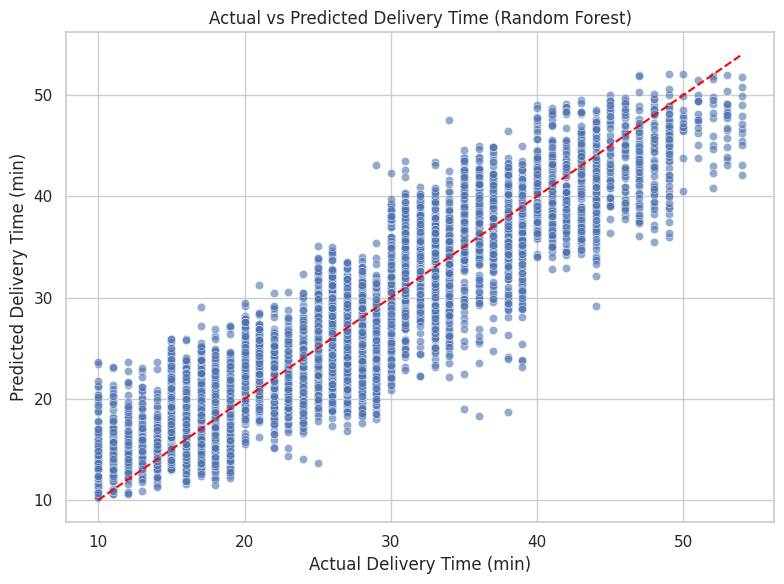

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test_cat, y=rf_pred, alpha=0.6, edgecolor='w')
plt.plot(
    [y_test_cat.min(), y_test_cat.max()],
    [y_test_cat.min(), y_test_cat.max()],
    color='red', linestyle='--'
)
plt.title("Actual vs Predicted Delivery Time (Random Forest)")
plt.xlabel("Actual Delivery Time (min)")
plt.ylabel("Predicted Delivery Time (min)")
plt.grid(True)
plt.tight_layout()
plt.show()

In [21]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.pipeline import Pipeline
from sklearn.inspection import permutation_importance

# Step 1: Gradient Boosting pipeline
gbr_pipeline = Pipeline([
    ("preprocess", preprocessor),
    ("model", GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42))
])

# Step 2: Train the model
gbr_pipeline.fit(X_train_cat, y_train_cat)

# Step 3: Predict
gbr_pred = gbr_pipeline.predict(X_test_cat)

# Step 4: Evaluate
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test_cat, gbr_pred)
rmse = np.sqrt(mean_squared_error(y_test_cat, gbr_pred))
r2 = r2_score(y_test_cat, gbr_pred)

print("Gradient Boosting Performance:")
print(f"MAE: {mae:.2f} minutes")
print(f"RMSE: {rmse:.2f} minutes")
print(f"R² Score: {r2:.2f}")


Gradient Boosting Performance:
MAE: 3.48 minutes
RMSE: 4.34 minutes
R² Score: 0.79


/tmp/ipython-input-3480780854.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importances_df, palette='viridis')


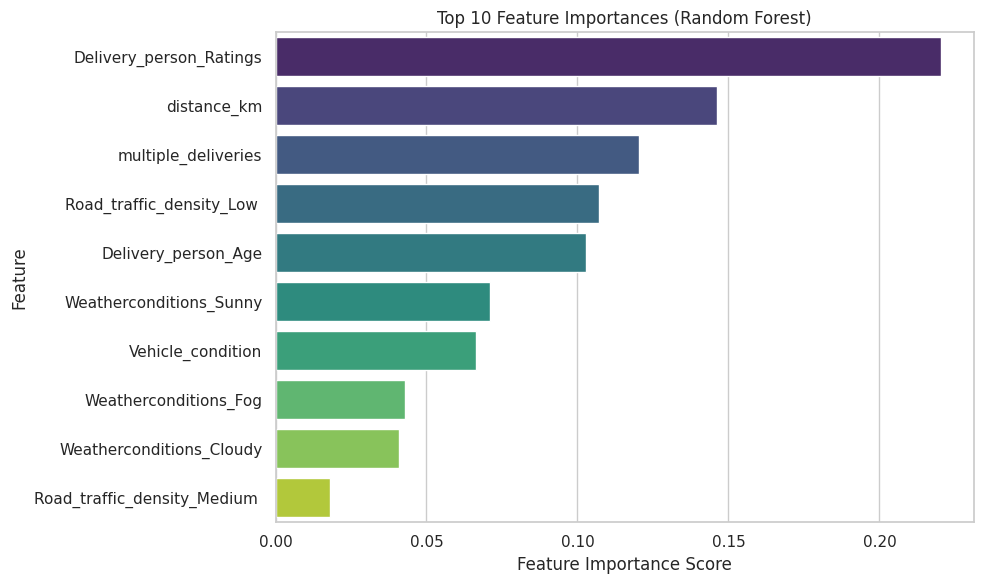

In [22]:
# Access the trained RF model from pipeline
rf_model = rf_pipeline.named_steps['model']

# Get feature names after encoding
encoded_feature_names = preprocessor.named_transformers_['onehot'].get_feature_names_out(categorical_features)
all_feature_names = list(encoded_feature_names) + numeric_features

# Get importances
importances = rf_model.feature_importances_

# Create DataFrame
import pandas as pd
importances_df = pd.DataFrame({
    'Feature': all_feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False).head(10)

# Plot
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importances_df, palette='viridis')
plt.title("Top 10 Feature Importances (Random Forest)")
plt.xlabel("Feature Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


## 🔍 Top 5 Feature Interpretations


---

### 1️⃣ **`Delivery_person_Ratings`**  
🚀 **Most Important Feature!**

Higher-rated delivery personnel complete deliveries faster.  
This suggests that **experience, efficiency, and professionalism** have a strong impact on delivery speed.

**✅ Business Action:**
- Prioritize **highly-rated drivers** for complex or long-distance orders.
- Offer **incentives** for drivers with consistent 5-star performance.
- Optimize **training programs** for low-rated drivers.

---

### 2️⃣ **`distance_km`**  
📌 Still a major factor.

Longer trips naturally increase delivery time.  
But in your model, it’s **less important than driver ratings**!

**✅ Business Action:**
- Encourage customers to **order from closer restaurants** via smart UI nudges.
- Optimize **delivery zones** and implement **dynamic pricing** based on distance.

---

### 3️⃣ **`multiple_deliveries`**  
📦 More deliveries per trip = slower service.

Drivers handling multiple orders take longer due to **multiple stops**.  
Still a strong factor — though ranked below distance.

**✅ Business Action:**
- **Limit multi-order batching** in peak hours.
- Prioritize **single-order dispatching** during rush periods for faster delivery.

---

### 4️⃣ **`Delivery_person_Age`**  
👨‍🦳 Older drivers take longer than younger ones?

May relate to driving speed, adaptability, or comfort with tech.  
Could be **correlated with efficiency**, even if not the root cause.

**✅ Business Action:**
- Match **high-speed, time-sensitive orders** with experienced but younger drivers.
- Improve **route optimization tools** for all age groups.

---

### 5️⃣ **`Road_traffic_density_Low`**  
🚦 Surprisingly important!

Low traffic usually means faster deliveries — but its **higher importance** suggests something deeper.  
Possibly due to **open roads allowing quicker travel** with fewer stops.

**✅ Business Action:**
- Factor in **real-time traffic density** in ETA predictions.
- Optimize **delivery windows** to avoid peak congestion.

---

## 🔥 Final Business Takeaways

1️⃣ **Great drivers > Short distances** → Optimize driver assignments!  
2️⃣ **Batching = slower speed** → Fine-tune multi-order allocation.  
3️⃣ **Younger drivers may be faster** → Personalized training needed.  
4️⃣ **Traffic impact isn’t linear** → Real-time optimization matters.
